## Strange attractors



### Import Libs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
%matplotlib inline

### Setup

In [2]:
sys.path.append('../src/')
from attractors import *

### Visualize

In [3]:
from scipy.integrate import ode

np.random.seed(101)
time = np.arange(0, 100, 0.01)
Y = np.empty((3, time.size))
r = ode(lorenz).set_integrator('dopri5')
r.set_initial_value(Y[:, 0], t=time[0])
Y[:, 0] = np.random.random(size=3)

In [4]:
for i, t in enumerate(time):
    if not r.successful():
        break
    if i == 0:
        continue # skip the initial position
    r.integrate(t)
    Y[:, i] = r.y

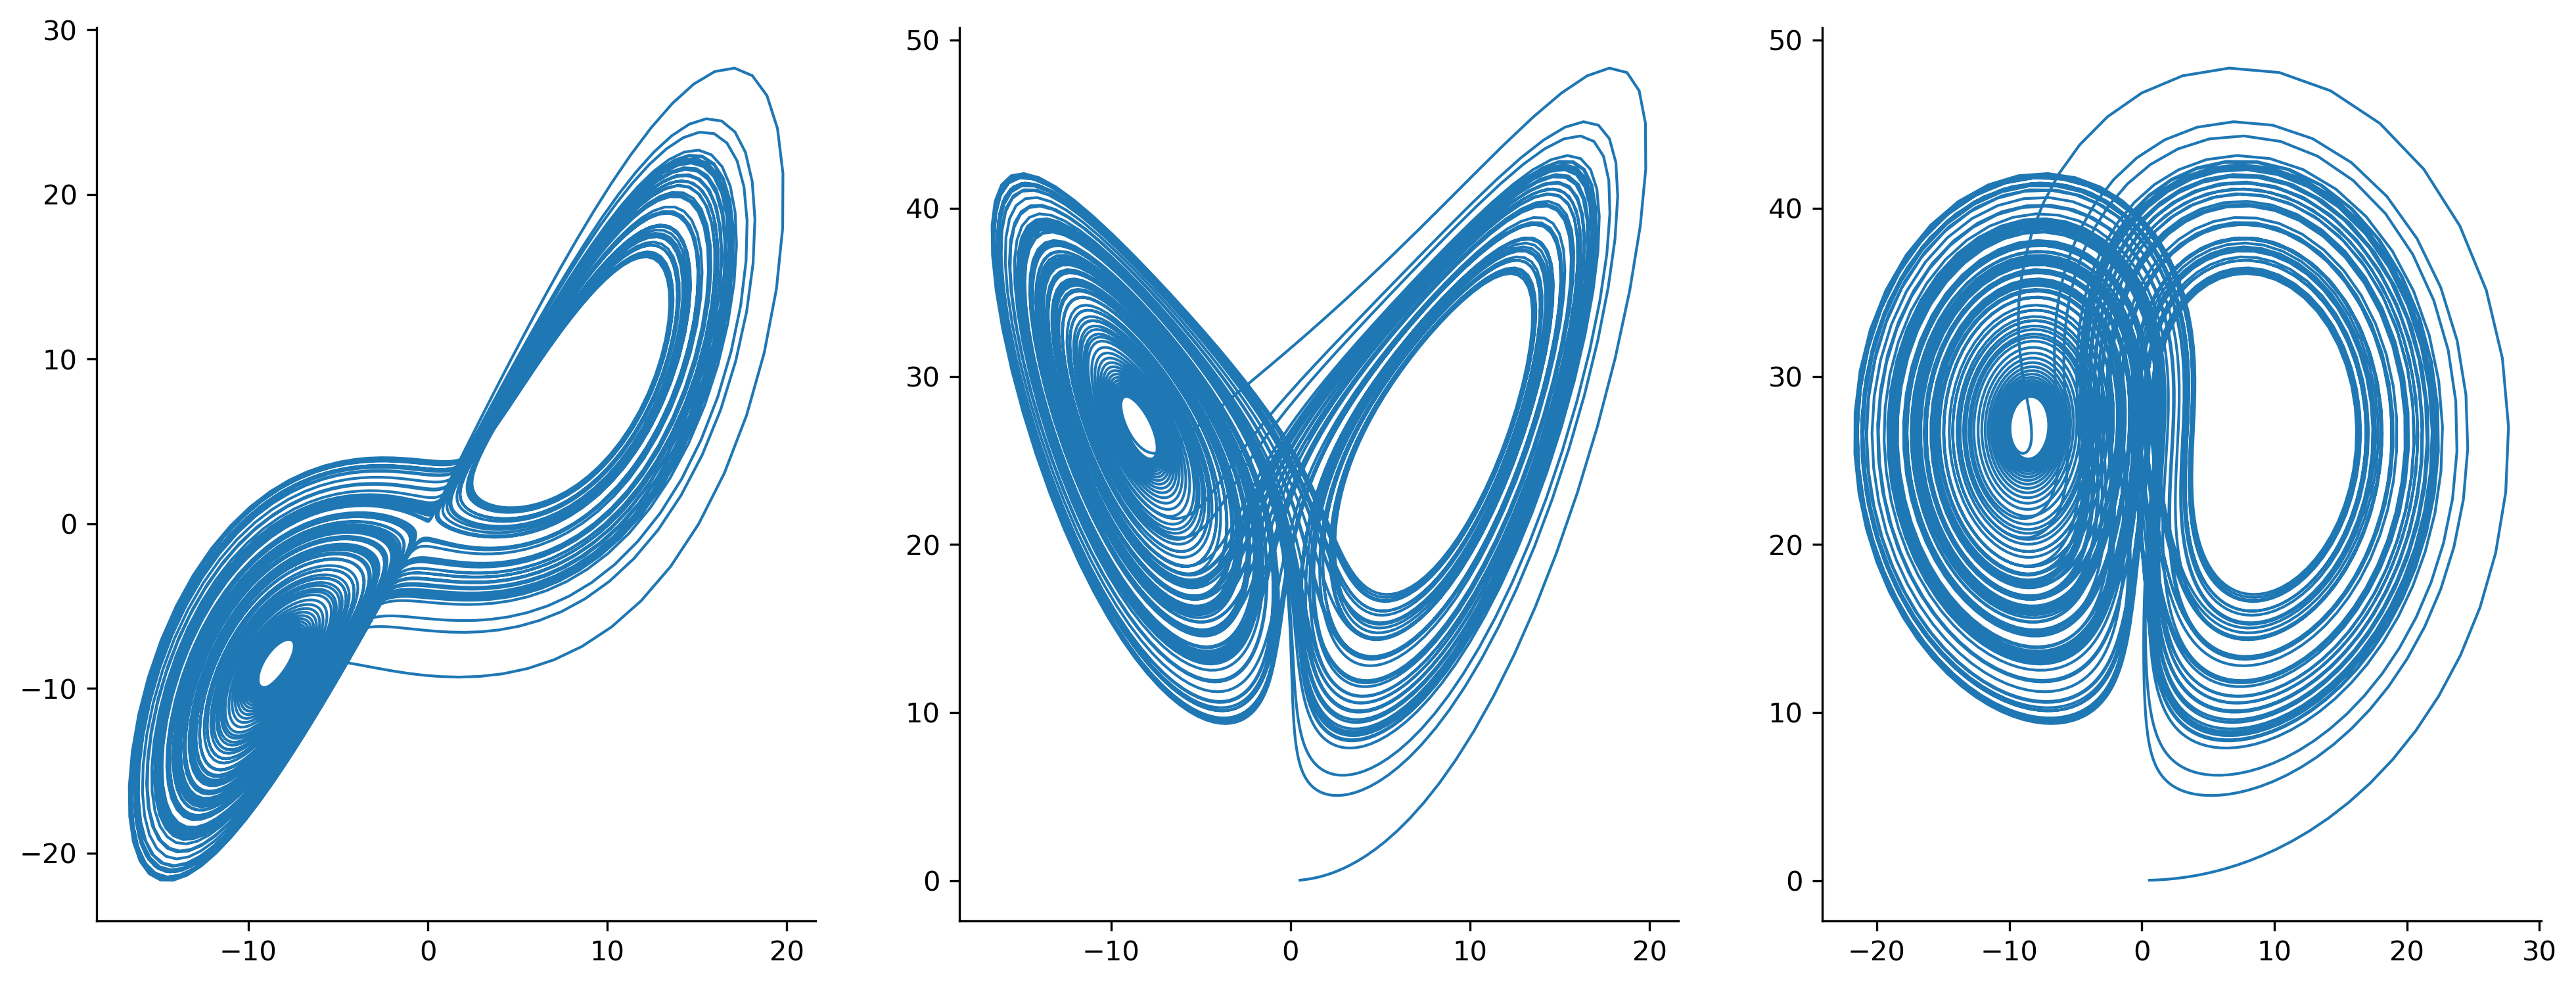

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(16, 6), dpi=300)

ax = ax.ravel()

pairs = [(Y[0, :], Y[1, :]),
         (Y[0, :], Y[2, :]), 
         (Y[1, :], Y[2, :])]

for i, pair in enumerate(pairs):

    ax[i].plot(pair[0], pair[1], lw=1.0)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)